# Proyecto Decission Tree

- IMPORTS


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier

In [43]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.to_csv("../data/raw/diabetes_data.csv", index=False)

total_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
total_data.duplicated().sum()

0

- EDA

In [45]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


-ANALISIS VARIABLES UNIVARIADAS

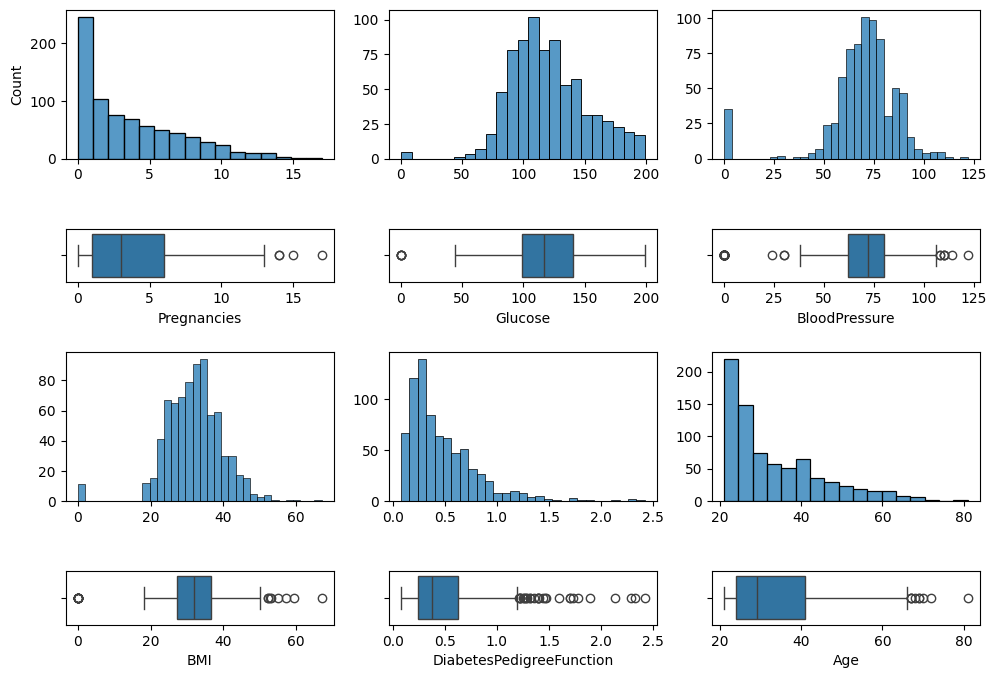

In [46]:
fig, axs = plt.subplots(4, 3, figsize = (10, 7))

sns.histplot(ax = axs[0, 0], data = total_data, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axs[1, 0], data = total_data, x = "Pregnancies").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 1], data = total_data, x = "Glucose").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 1], data = total_data, x = "Glucose").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 2], data = total_data, x = "BloodPressure").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 2], data = total_data, x = "BloodPressure").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 0], data = total_data, x = "BMI").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 0], data = total_data, x = "BMI").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 1], data = total_data, x = "DiabetesPedigreeFunction").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 1], data = total_data, x = "DiabetesPedigreeFunction").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 2], data = total_data, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 2], data = total_data, x = "Age").set_box_aspect(0.2)

plt.tight_layout()
plt.show()

ANALISIS DE VARIABLES MULTIVARIADAS

NUMERICA-NUMERICA

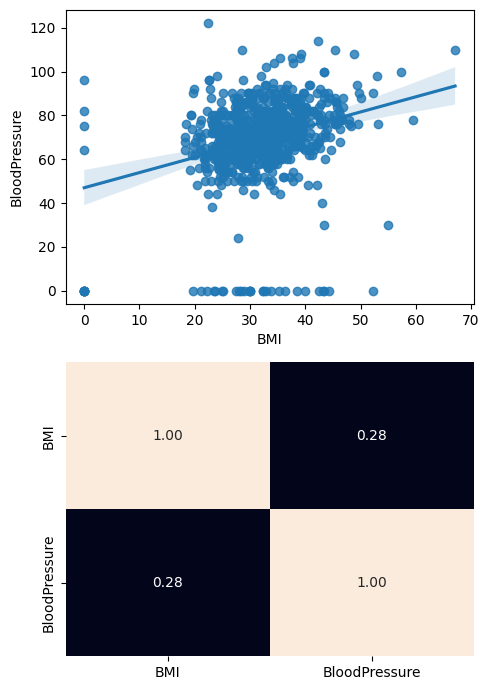

In [47]:
fig, axis = plt.subplots(2, figsize = (5, 7))

sns.regplot(ax = axis[0], data = total_data, x = "BMI", y = "BloodPressure")
sns.heatmap(total_data[["BMI", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()
plt.show()

CATEGORICA-NUMERICA

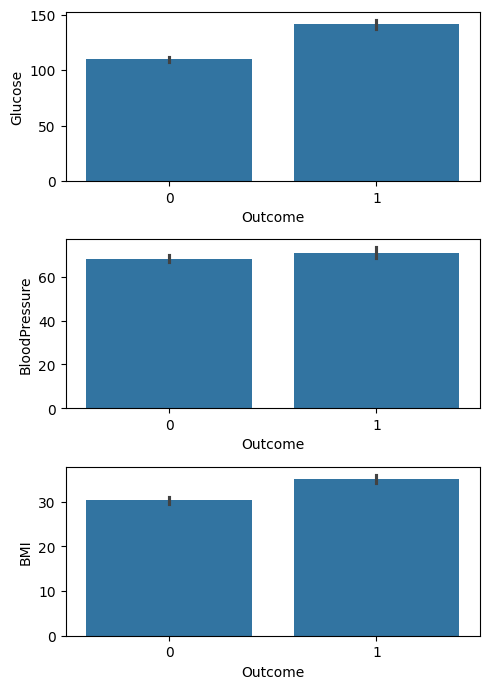

In [48]:
fig, axis = plt.subplots(3, figsize = (5, 7))

sns.barplot(ax = axis[0], data = total_data, x = "Outcome", y = "Glucose")
sns.barplot(ax = axis[1], data = total_data, x = "Outcome", y = "BloodPressure")
sns.barplot(ax = axis[2], data = total_data, x = "Outcome", y = "BMI")

plt.tight_layout()

plt.show()

-CORRELACION

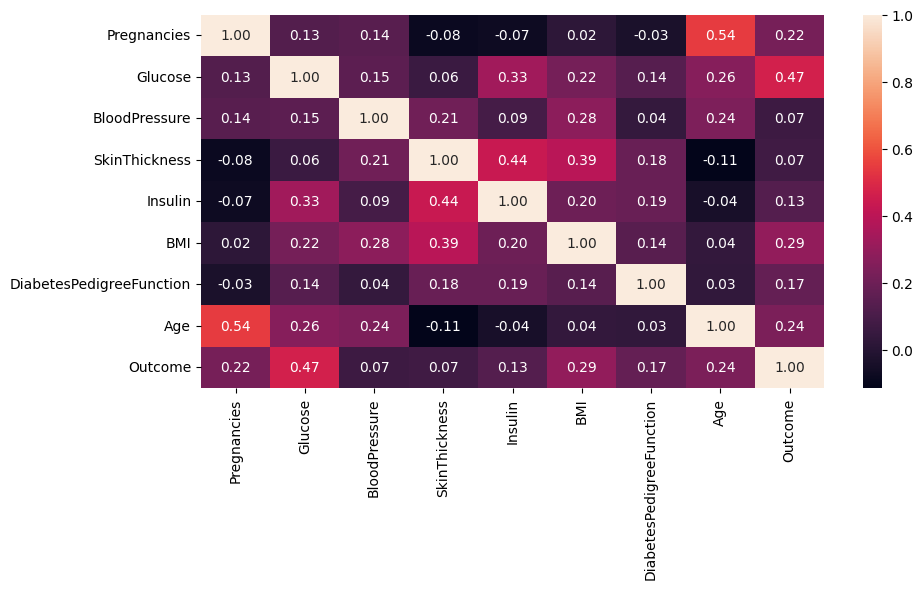

In [49]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Las caracteristicas de edad y glucosa, y grosor de pliegue con insulina son las que mas correlación tienen.

In [50]:
total_data.to_csv("../data/interim/diabetes_data.csv", index=False)

FEATURE ENGINEERING

In [51]:
total_data = pd.read_csv("../data/interim/diabetes_data.csv")
total_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


En el paso anterior comprobamos diversos valores 0, en Glucose, BloodPlessure e IMC, por lo que vamos a eliminarlos.

In [52]:
print(total_data[total_data['Glucose'] == 0].shape)
print(total_data[total_data['BloodPressure'] == 0].shape)
print(total_data[total_data['BMI'] == 0].shape)

(5, 9)
(35, 9)
(11, 9)


In [53]:
total_data = total_data[total_data['Glucose'] != 0]
total_data = total_data[total_data['BloodPressure'] != 0]
total_data = total_data[total_data['BMI'] != 0]
total_data.shape

(724, 9)

comprobamos y vemos que no varia :

In [54]:
total_data.head()
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


FEATURE SELECTION

In [55]:
X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(chi2, k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age
0,0.0,137.0,27.0,0.0,27.3,59.0
1,3.0,78.0,32.0,88.0,31.0,26.0
2,1.0,82.0,13.0,95.0,21.2,23.0
3,13.0,104.0,0.0,0.0,31.2,38.0
4,1.0,97.0,15.0,0.0,18.2,21.0


In [56]:
X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

# Model Training


In [57]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

- GRAFICAMOS

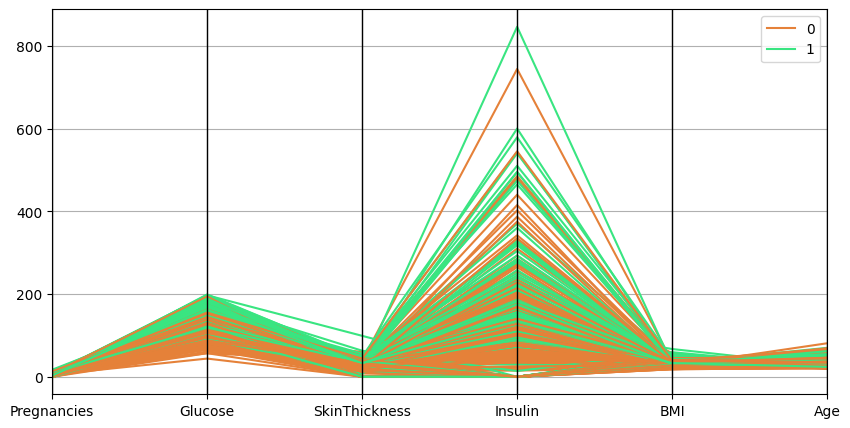

In [58]:
plt.figure(figsize=(10, 5))

pd.plotting.parallel_coordinates(train_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [59]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

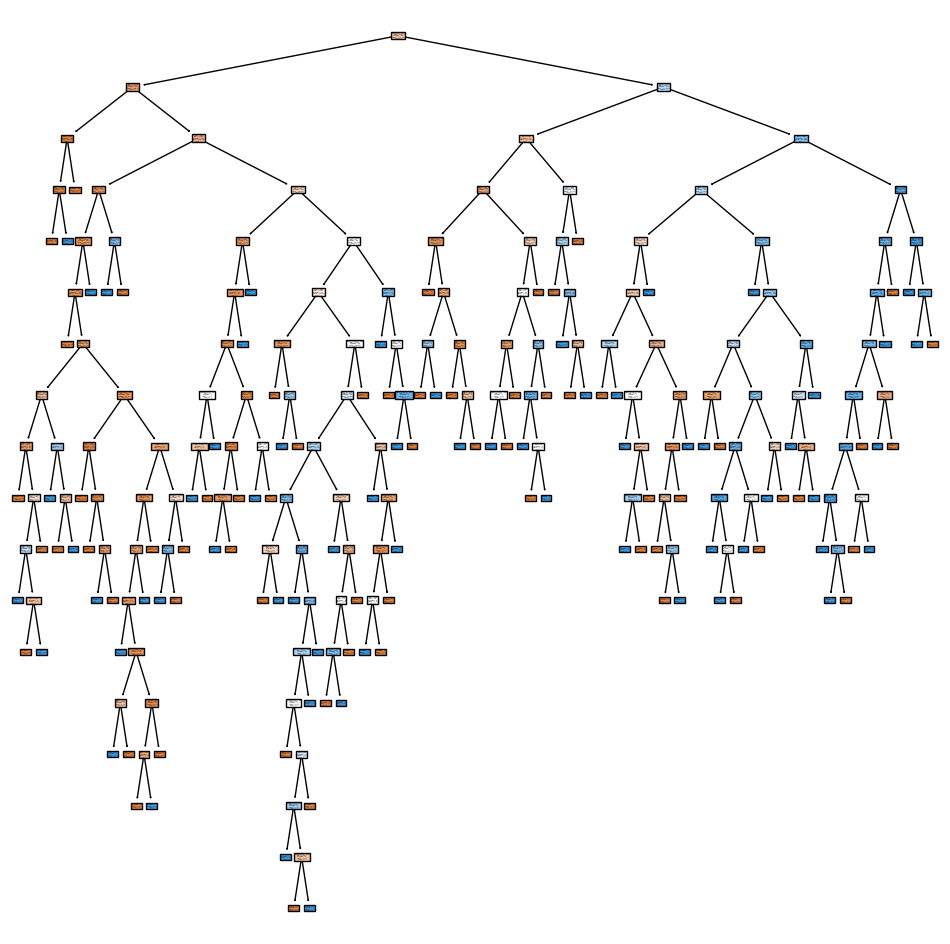

In [61]:
fig = plt.figure(figsize=(12,12))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [62]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7103448275862069

MODEL OPTIMIZATION

In [64]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid.fit(X_train, y_train)

print(f"Los mejores hiperparámetros son : {grid.best_params_}")
print(f"La mejor puntuación es: {grid.best_score_}")

Los mejores hiperparámetros son : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
La mejor puntuación es: 0.7288566243194192


In [65]:
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=10,
    random_state = 42
    )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8068965517241379

In [ ]:
from pickle import dump

with open("../models/decision-tree-1.0.pkl", "wb") as f:
    dump(model, f)